In [1]:
import os
import sys
sys.path.append('../')
from source.computation_support import *
from source.myGaborFunctions import *
from source.color_transformations import *
from source.graph_operations import *
from source.plot_save_figures import *

# %matplotlib qt

## Input image (RGB)

(-0.5, 480.5, 320.5, -0.5)

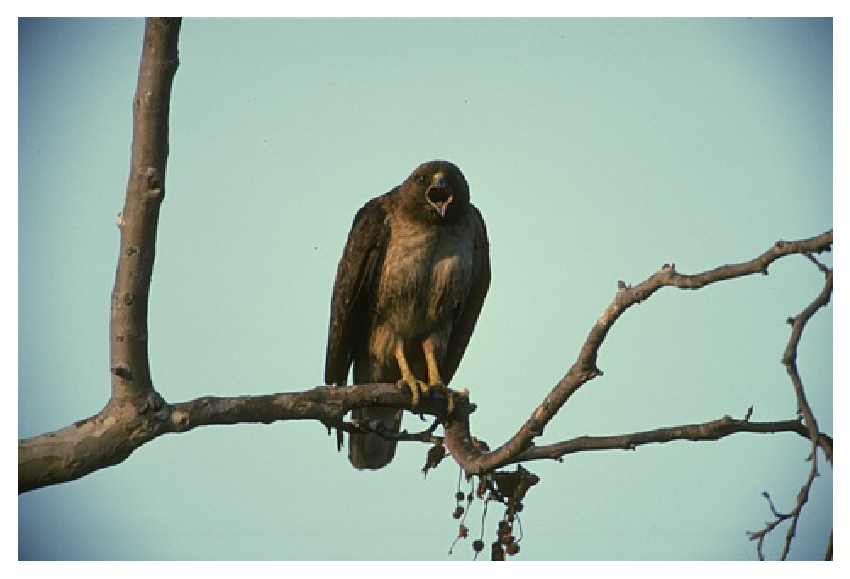

In [2]:
# Read and show input image
inDir = '../../data/images/7images/test/'
list_imgs = os.listdir(inDir)
indx = 0 # 60 #
img = io.imread(inDir + list_imgs[indx])
rows, cols, channels = img.shape
plt.figure(dpi=180)
plt.imshow(img)
plt.axis('off')
# plt.savefig('aigle_input.png')

In [3]:
print(list_imgs[indx])

42049.jpg


## RGB -> Gray -> Lum

$$L(x,y) = img2gray(RGB(x,y))$$

## RGB -> HSV ->  Chr
$$HSV(x,y) = img2hsv(RGB(x,y))$$
$$C(x,y) = S(x,y) e^{iH(x,y)}$$



In [4]:
# Image color decomposition: 2 channel complex color space

color_space = 'HSV'  # HS, LAB

img_2ch = img2complex_colorspace(img, color_space)

lum, chrom_r, chrom_i = img_2ch 

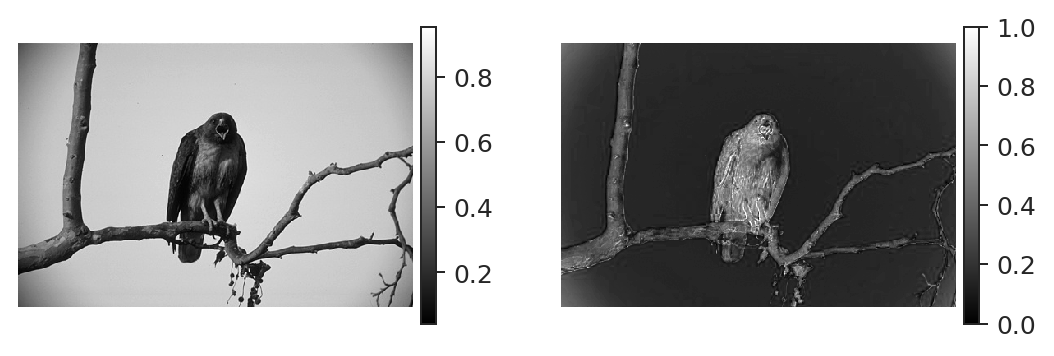

In [5]:
# Visulization of image in complex channel
fig, axes = plt.subplots(1, 2, dpi=180)

im0 = axes[0].imshow(lum, cmap='gray')
axes[0].axis('off')
axes[0].tick_params(axis='both', which='both', labelsize=1, pad=0.1, length=2)
fig.colorbar(im0, ax=axes[0], fraction=0.0355, pad=0.02)

im1 = axes[1].imshow(np.abs(chrom_r + chrom_i*1j), cmap='gray')
axes[1].axis('off')
axes[1].tick_params(axis='both', which='both', labelsize=1, pad=0.1, length=2)
fig.colorbar(im1, ax=axes[1], fraction=0.0355, pad=0.02)

fig.subplots_adjust(top=0.92, bottom=0.08, left=0.05, right=0.94, hspace=0.3, wspace=0.3)
# plt.savefig('lum_chrom_whitnorm.png')

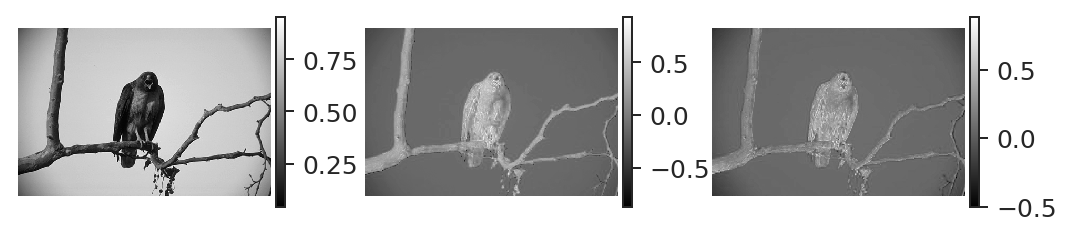

In [6]:
# lum = linear_normalization(lum, 255., 0.)
# chrom_r = linear_normalization(chrom_r, 255., 0.)#linear_normalization2(chrom_r)
# chrom_i = linear_normalization(chrom_i, 255., 0.)#linear_normalization2(chrom_i)

# Visulization of image in complex channel
fig, axes = plt.subplots(1, 3, dpi=180)
for ii in range(channels):
    im = axes[ii].imshow(img_2ch[ii], cmap='gray')
    axes[ii].axis('off')
    axes[ii].tick_params(axis='both', which='both', labelsize=1, pad=0.1, length=2)
    fig.colorbar(im, ax=axes[ii], fraction=0.0355, pad=0.02)
fig.subplots_adjust(top=0.92, bottom=0.08, left=0.05, right=0.94, hspace=0.3, wspace=0.3)
# plt.savefig('lum_chrom_whitnorm.png')

In [7]:
print('lum min: ', lum.min(), ', max: ', lum.max())
print('chr_r min: ', chrom_r.min(), ', max: ', chrom_r.max())
print('chr_i min:', chrom_i.min(), ', max: ', chrom_i.max())

lum min:  0.043137256 , max:  0.9529412
chr_r min:  -0.87005794 , max:  0.92718387
chr_i min: -0.50125843 , max:  0.8844166


## Parseval's identity (on image)
$$\int_{\Omega}{|f(x,y)|^{2}} dx dy = |\Omega|$$
$$\frac{1}{|\Omega|}\int_{\Omega}{|f(x,y)|^{2}} dx dy = 1$$

* $|\Omega|$: Image support

%* $i = \{lum, chr_r, chr_i\}$

0.9999998988024689


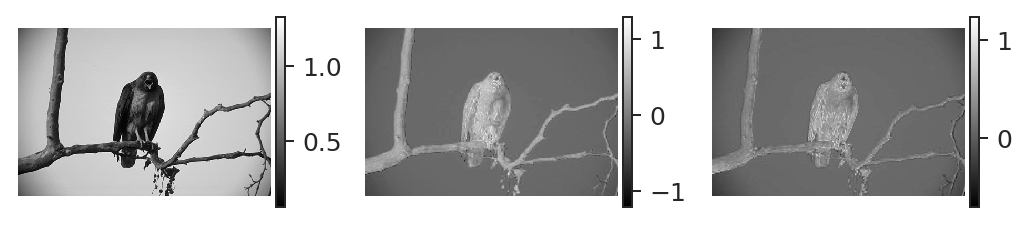

In [8]:
img_2ch_norm = normalize_img(img_2ch, rows, cols)

# Visulization of image in complex channel
fig, axes = plt.subplots(1, 3, dpi=180)
for ii in range(channels):
    im = axes[ii].imshow(img_2ch_norm[ii], cmap='gray')
    axes[ii].axis('off')
    axes[ii].tick_params(axis='both', which='both', labelsize=1, pad=0.1, length=2)
    fig.colorbar(im, ax=axes[ii], fraction=0.0355, pad=0.02)
fig.subplots_adjust(top=0.92, bottom=0.08, left=0.05, right=0.94, hspace=0.3, wspace=0.3)
    
# plt.savefig('lum_chrom__heis_whitnorm.png')

print(np.sum(img_2ch_norm**2) / (rows*cols))


In [9]:
# print('lum min: ', img_2ch_norm[0].min(), ', max: ', img_2ch_norm[0].max())
# print('chr_r min: ', img_2ch_norm[1].min(), ', max: ', img_2ch_norm[1].max())
# print('chr_i min:', img_2ch_norm[2].min(), ', max: ', img_2ch_norm[2].max())


## Generating ank of Gabor filters

Text(0.5, 0.98, 'Gabor filterbank ')

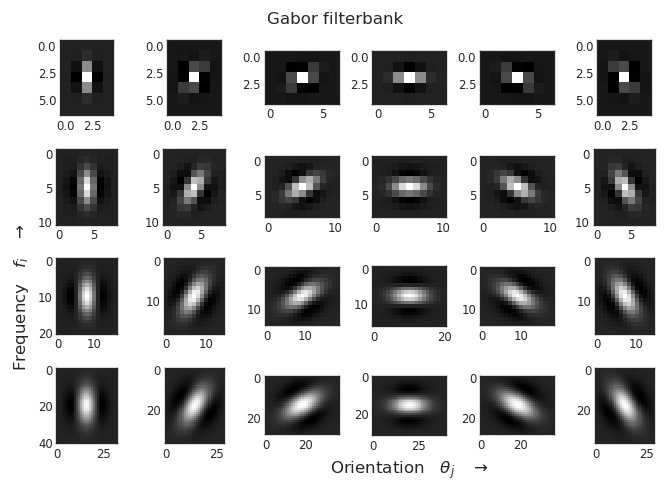

In [10]:
# Generating Gabor filterbank

min_period = 3.
max_period = 25.
fb = 1
ab = 30
c1 = 0.9
c2 = 0.9
stds = 3.0

gabor_filters, frequencies, angles = makeGabor_filterbank(min_period, max_period, fb, ab, c1, c2, stds)
n_freq = len(frequencies)
n_angles = len(angles)

# Visualization of filters
fig, axes = plt.subplots(n_freq, n_angles, dpi=120)
ff = 0
for ii, f_i in enumerate(frequencies):
    for jj, a_i in enumerate(angles):
        axes[ii, jj].imshow(gabor_filters[ff][0].real, cmap='gray') #, vmin=0., vmax=val_max
        axes[ii, jj].tick_params(axis='both', which='both', labelsize=7, pad=0.1, length=2)#, bottom=False, left=False, labelbottom=False, labelleft=False

        ff += 1
axes[n_freq-1, np.int(np.ceil(n_angles/2))].set_xlabel('Orientation   $\\theta_j $   $\\rightarrow$', fontsize=10)
axes[np.int(np.ceil(n_freq/2)), 0].set_ylabel('Frequency   $f_i$   $\\rightarrow$', fontsize=10)
fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
fig.suptitle('Gabor filterbank ', fontsize=10)

## Applying filters on Lum, Chr_r and Chr_i (and Parseval's identity on G responses)

$$\int_{\Omega}|f(x,y)|^{2} dx dy = \sum_{f, \theta} \int |r(x,y)|^{2} dx dy $$
$$\int_{\Omega}|f(x,y)|^{2} dx dy = \sum_{f, \theta} \int |r(x,y)|^{2} dx dy \overset{!}{=}|\Omega|$$
$$\frac{1}{|\Omega|}\int_{\Omega}|f(x,y)|^{2} dx dy = \frac{1}{|\Omega|}\sum_{f, \theta} \int |r(x,y)|^{2} dx dy \overset{!}{=}1$$


* $|\Omega|$: Image support
%* $i = \{lum, chr_r, chr_i\}$
* $f(x,y)$: Image values
* $r(x,y)$: Filter response

In [11]:
# Filtering of 2 channel complex image 

r_type = 'L2'  # 'real'
gsmooth = True
opn = True
selem_size = 1
num_cores = -1

img_complex = img_2ch

filter_responses = np.array(Parallel(n_jobs=num_cores, prefer='processes')(
        delayed(applyGabor_filterbank)(img_channel, gabor_filters, resp_type=r_type, smooth=gsmooth,
                                       morph_opening=opn, se_z=selem_size) for img_channel in img_complex))

# g_responses_norm = normalize_img(filter_responses, rows, cols) # Parseval's normalization
g_responses_norm = filter_responses # NO Parseval's normalization


print(np.sum(g_responses_norm**2) / (rows*cols))

1.7819749097277464


Text(0.5, 0.98, 'Luminance Gabor responses')

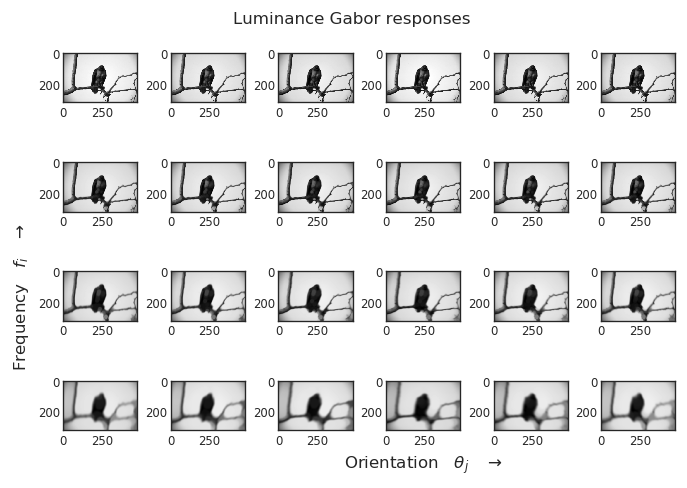

In [12]:
# Visualization of responses
# Luminance
fig, axes = plt.subplots(n_freq, n_angles, dpi=120)
ff = 0
for ii, f_i in enumerate(frequencies):
    for jj, a_i in enumerate(angles):
        axes[ii, jj].imshow(g_responses_norm[0][ff], cmap='gray', vmax=g_responses_norm.max()) #, vmin=0., vmax=val_max
        axes[ii, jj].tick_params(axis='both', which='both', labelsize=7, pad=0.1, length=2)#, bottom=False, left=False, labelbottom=False, labelleft=False
        ff += 1
axes[n_freq-1, np.int(np.ceil(n_angles/2))].set_xlabel('Orientation   $\\theta_j $   $\\rightarrow$', fontsize=10)
axes[np.int(np.ceil(n_freq/2)), 0].set_ylabel('Frequency   $f_i$   $\\rightarrow$', fontsize=10)
fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
fig.suptitle('Luminance Gabor responses', fontsize=10)

Text(0.5, 0.98, 'Chrominance Re Gabor responses')

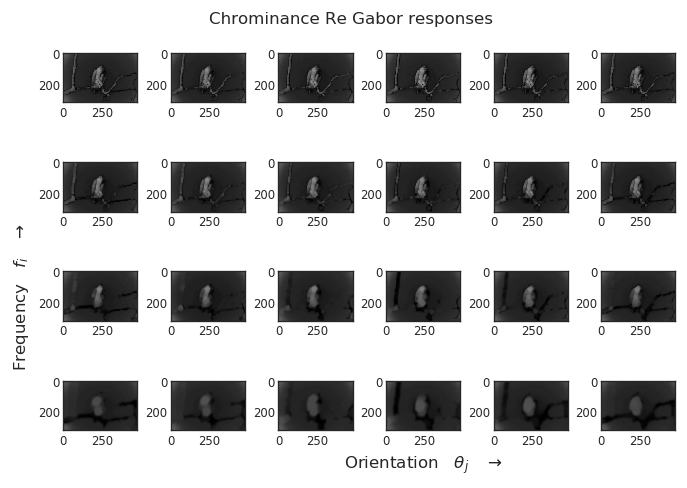

In [13]:
# Visualization of responses
# Chrominance real
fig, axes = plt.subplots(n_freq, n_angles, dpi=120)
ff = 0
for ii, f_i in enumerate(frequencies):
    for jj, a_i in enumerate(angles):
        axes[ii, jj].imshow(g_responses_norm[1][ff], cmap='gray', vmax=g_responses_norm.max()) #, vmin=0., vmax=val_max
        axes[ii, jj].tick_params(axis='both', which='both', labelsize=7, pad=0.1, length=2)#, bottom=False, left=False, labelbottom=False, labelleft=False
        ff += 1
axes[n_freq-1, np.int(np.ceil(n_angles/2))].set_xlabel('Orientation   $\\theta_j $   $\\rightarrow$', fontsize=10)
axes[np.int(np.ceil(n_freq/2)), 0].set_ylabel('Frequency   $f_i$   $\\rightarrow$', fontsize=10)
fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
fig.suptitle('Chrominance Re Gabor responses', fontsize=10)

Text(0.5, 0.98, 'Chrominance Im Gabor responses')

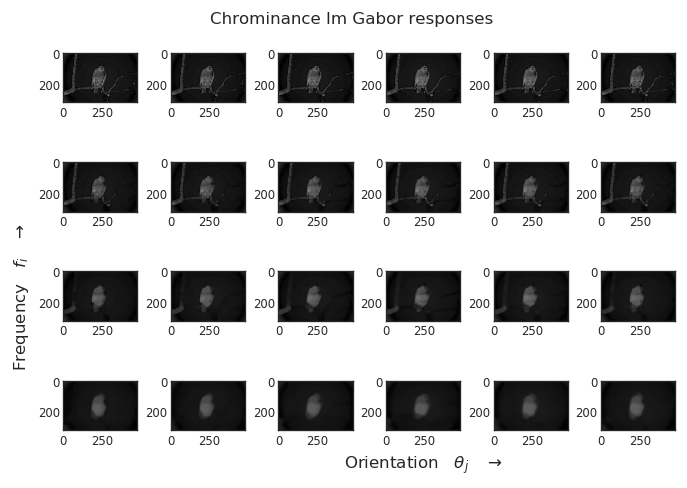

In [14]:
# Visualization of responses
# Chrominance imag
fig, axes = plt.subplots(n_freq, n_angles, dpi=120)
ff = 0
for ii, f_i in enumerate(frequencies):
    for jj, a_i in enumerate(angles):
        axes[ii, jj].imshow(g_responses_norm[2][ff], cmap='gray', vmax=g_responses_norm.max()) #, vmin=0., vmax=val_max
        axes[ii, jj].tick_params(axis='both', which='both', labelsize=7, pad=0.1, length=2)#, bottom=False, left=False, labelbottom=False, labelleft=False
        ff += 1
axes[n_freq-1, np.int(np.ceil(n_angles/2))].set_xlabel('Orientation   $\\theta_j $   $\\rightarrow$', fontsize=10)
axes[np.int(np.ceil(n_freq/2)), 0].set_ylabel('Frequency   $f_i$   $\\rightarrow$', fontsize=10)
fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
fig.suptitle('Chrominance Im Gabor responses', fontsize=10)

## Generating pixel level 4nn graph

In [15]:
# Computing Graphs the images
kneighbors = 4

edges_info = get_pixel_graph(kneighbors, (rows, cols, channels))
edges_index, neighbors_edges = edges_info

## Computing EMD on graph edges

In [16]:
ground_distance = cost_matrix_texture(n_freq, n_angles, fb)
g_energies = g_responses_norm.reshape(channels, n_freq*n_angles, rows*cols).T

g_energies_lum = g_energies[:, :, 0]
g_energies_cr = g_energies[:, :, 1]
g_energies_ci = g_energies[:, :, 2]

''' Updating edges weights with similarity measure (OT/KL) '''
num_cores = multiprocessing.cpu_count()
weights_lum = np.array(Parallel(n_jobs=int(num_cores))
                       (delayed(em_dist_Pele)(np.float64(g_energies_lum[e]), ground_distance) for e in edges_index))

weights_cr = np.array(Parallel(n_jobs=int(num_cores))
                      (delayed(em_dist_Pele)(np.float64(g_energies_cr[e]), ground_distance) for e in edges_index))

weights_ci = np.array(Parallel(n_jobs=int(num_cores))
                      (delayed(em_dist_Pele)(np.float64(g_energies_ci[e]), ground_distance) for e in edges_index))

In [17]:
gradient_lum = np.empty((rows * cols), dtype=np.float32)
gradient_cr = np.empty((rows * cols), dtype=np.float32)
gradient_ci = np.empty((rows * cols), dtype=np.float32)

for pp in range(rows * cols):
    gradient_lum[pp] = np.max(weights_lum[neighbors_edges[pp]])
    gradient_cr[pp] = np.max(weights_cr[neighbors_edges[pp]])
    gradient_ci[pp] = np.max(weights_ci[neighbors_edges[pp]])

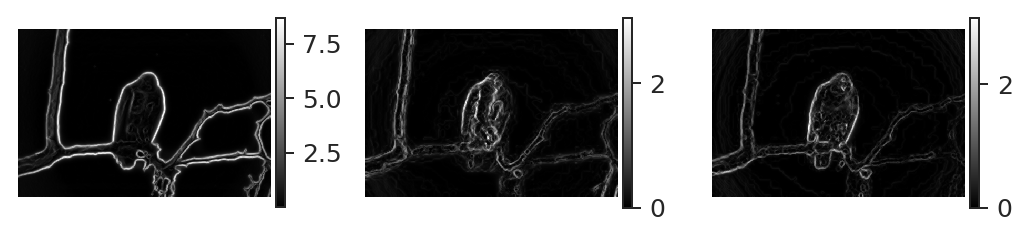

In [18]:
gradients = np.array((gradient_lum, gradient_cr, gradient_ci))

# Visulization of EMD gradients
fig, axes = plt.subplots(1, 3, dpi=180)
for ii in range(channels):
    im = axes[ii].imshow(gradients[ii].reshape((rows, cols)), cmap='gray')
    axes[ii].axis('off')
    axes[ii].tick_params(axis='both', which='both', labelsize=1, pad=0.1, length=2)
    fig.colorbar(im, ax=axes[ii], fraction=0.0355, pad=0.02)
fig.subplots_adjust(top=0.92, bottom=0.08, left=0.05, right=0.94, hspace=0.3, wspace=0.3)
plt.savefig('emd_Pele.png')

In [19]:
print('gradient min: ', gradient_lum.min(), ', max: ', gradient_lum.max())
print('gradient min: ', gradient_cr.min(), ', max: ', gradient_cr.max())
print('gradient min: ', gradient_cr.min(), ', max: ', gradient_cr.max())

gradient min:  0.00075881707 , max:  8.681983
gradient min:  0.0 , max:  3.0529556
gradient min:  0.0 , max:  3.0529556


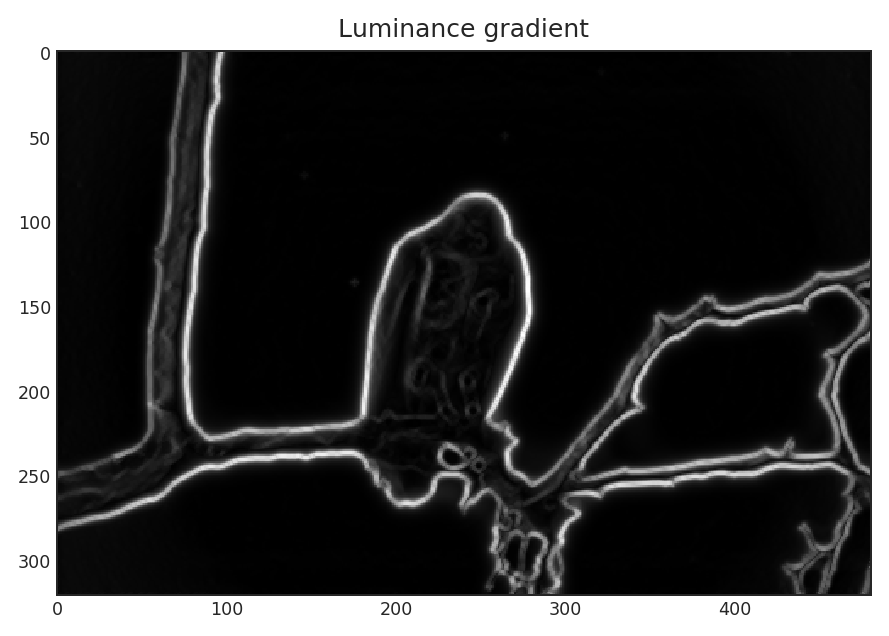

In [20]:
plt.figure(dpi=180)
plt.title('Luminance gradient', fontsize=10)
plt.imshow(gradient_lum.reshape((rows, cols)), cmap='gray')
plt.tick_params(axis='both', which='both', labelsize=7, pad=0.1, length=2)
# plt.colorbar()
plt.savefig('lum_'+list_imgs[indx])

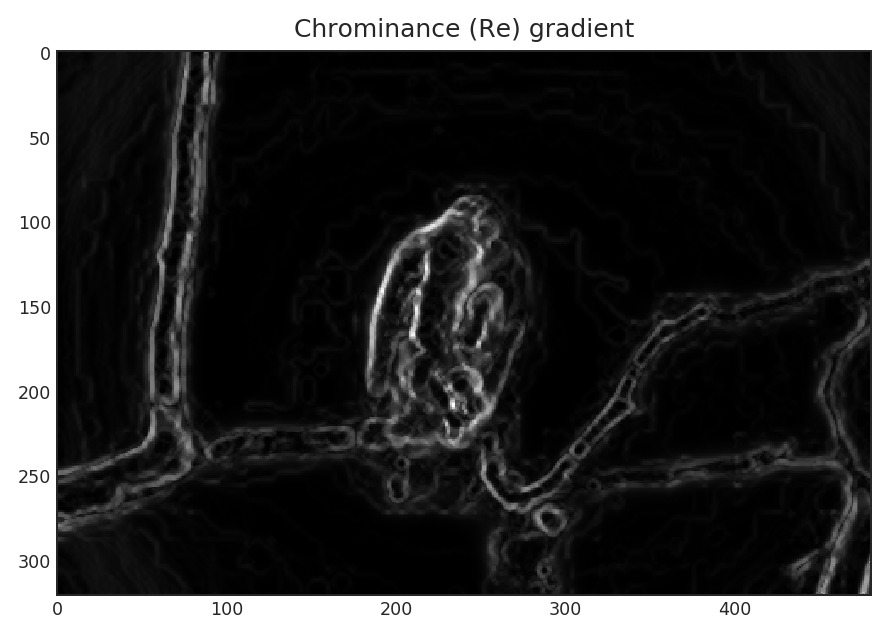

In [21]:
plt.figure(dpi=180)
plt.title('Chrominance (Re) gradient', fontsize=10)
plt.imshow(gradient_cr.reshape(rows, cols), cmap='gray')
plt.tick_params(axis='both', which='both', labelsize=7, pad=0.1, length=2)
# plt.colorbar()
plt.savefig('cr_'+list_imgs[indx])

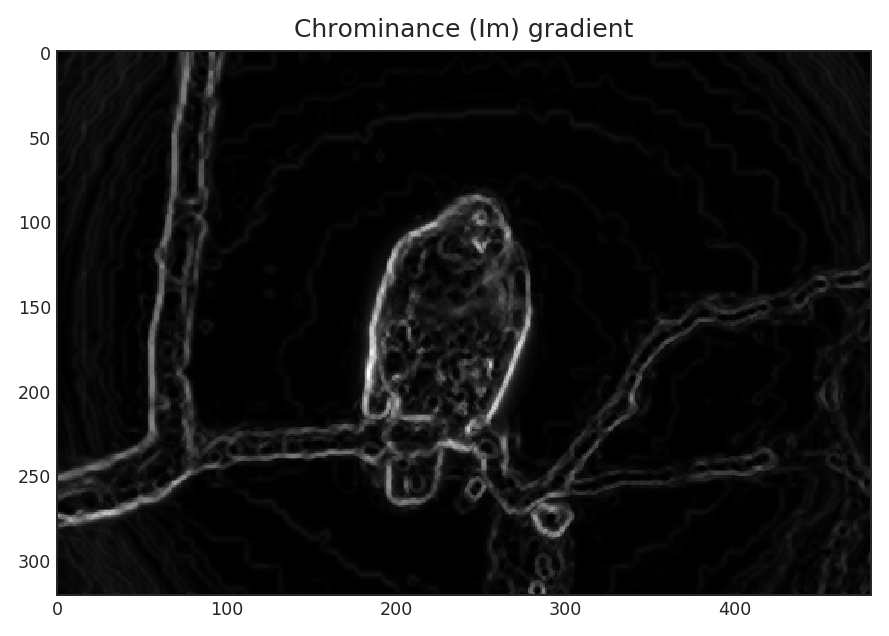

In [22]:
plt.figure(dpi=180)
plt.title('Chrominance (Im) gradient', fontsize=10)
plt.imshow(gradient_ci.reshape(rows, cols), cmap='gray')
plt.tick_params(axis='both', which='both', labelsize=7, pad=0.1, length=2)
# plt.colorbar()
plt.savefig('ci_'+list_imgs[indx])

In [23]:
# plt.imshow(ground_distance)

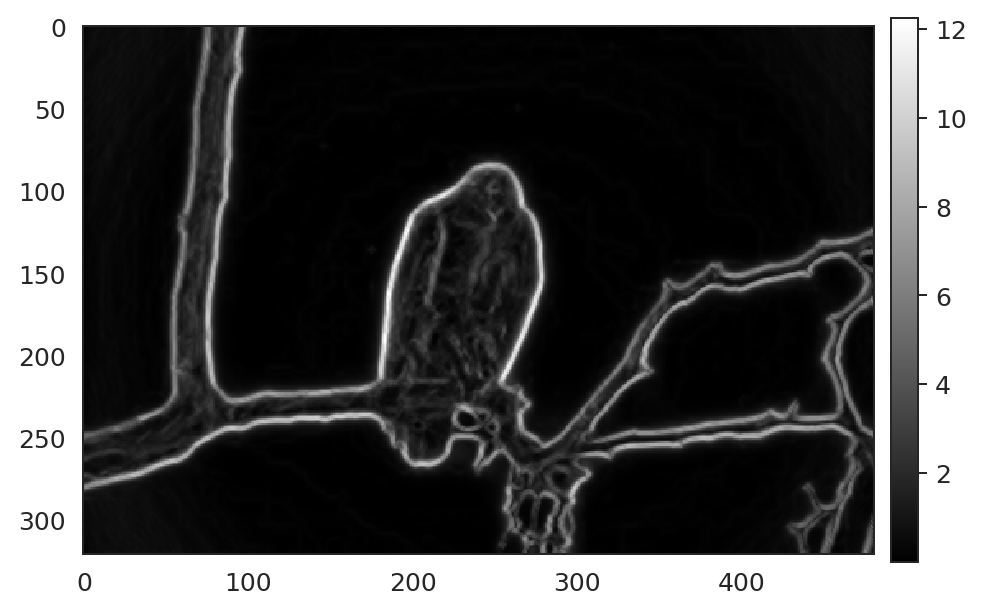

In [24]:
plt.figure(dpi=180)
plt.imshow((gradient_lum+gradient_cr+gradient_ci).reshape(rows, cols), cmap='gray')
plt.colorbar(fraction=0.0355, pad=0.02)
plt.savefig('clrbr_'+list_imgs[indx])


In [25]:
gradient_pred = gradient_lum + gradient_cr + gradient_ci

img_grad = ((gradient_pred - min(gradient_pred)) / (max(gradient_pred) - min(gradient_pred))) * 255
img_grad = np.uint8(img_grad.reshape(rows, cols))

img = Image.fromarray(img_grad)
img.save('Pele_' + list_imgs[indx].split('.')[0] + '.png')